In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma,gammainc,gammaincc
import scipy.integrate as integr
plt.rcParams['text.usetex']=True
from sklearn import preprocessing

In [2]:
#priors
c=3e8
Phi_s=10**(-3)
logMass_s=8.4
M_star=10**logMass_s
a=-1.19
beta2=0.5116394637708428
alpha_moy=0.12
alpha=alpha_moy
chi=0.5
#M=(645*10*alpha_moy)/(f*0.1)
def Dist_BH(M,z):
    return (1/(z+1))**(beta2)*Phi_s*(M/M_star)**(1+a)*np.exp(1-(M/M_star))

def P_M(M):
    return Phi_s*(M/(M_star))**(1+a)*np.exp(1-(M/M_star))

def Phi_MBrito(M):
    return 0.005*(M/3*10**6)**(-0.3)

def P_z(z):
    return 1/(1+z)**beta2

#Amplitudeh_0
m=1
def chi_f(alpha_f):
    return (4*alpha_f*m)/(4*alpha_f*m+m)
    
def dist_z(z):
    return Phi_s*(M_star/z)**(2-beta2)*np.exp(1)*gamma(a-beta2+3)


C1=(8e-28/10)*(alpha/0.1)**7*(10**6)*((chi-0.45)/0.1)
C1_Mpc=(8e-28/10)*(alpha/0.1)**7*((chi-0.45)/0.1)
H=(2*c/70)*1e-3
d0=(1-(7/(2*np.sqrt(10))))
d1=(1-1/np.sqrt(10))
zmax=4
dmin=H*(d0+d1)
dmax=H*(d0+d1*4)

def P_d(x):
    return ((H*d1)**(beta2-1)/(x-d0+H*d1)**(beta2))

def P_h0(x):
    umin=((x/C1_Mpc)/M_star)*(dmin-d0+H*d1)
    umax=((x/C1_Mpc)/M_star)*(dmax-d0+H*d1)
    first_term=(1/C1)*Phi_s*np.exp(1-((x/C1_Mpc)/M_star)*(d0-H*d1))*(H*d1)**(beta2-1)*(M_star/(x/C1_Mpc))**(2-beta2)
    gamma_diff=(gammainc(a-beta2+3,umax)-gammainc(a-beta2+3,umin))
    print(gamma_diff)
    print(first_term)
    return first_term*gamma_diff
#frequency

def P_h0app(x):
    up=(10**9/M_star)
    low=(10**5/M_star)
    return Phi_s*(C1)**(1-beta2)*M_star**(2-beta2)*np.exp(1)*(gammainc(a-beta2+3,up)-gammainc(a-beta2+3,low))*(1/x)**(2-beta2)

def P_h0local(x):
    return np.log((1/C1_Mpc)*Phi_s*((x/C1_Mpc)/(M_star))**(1+a)*np.exp(1-((x/C1_Mpc)/M_star)))

C2=(645*10*alpha_moy)/0.1
def P_f0(x):
    return (C2/x**2)*P_M((C2/x))
    


#frequency derivative

C3=3e-14*10**2*(alpha/0.1)**19*chi**2
def P_f0dot(x):
    return (np.sqrt(C3)/2)*(1/x**(3/2))*P_M(np.sqrt(C3/x))


 

In [3]:
def logP_h0local(x):
    return -np.log(C1_Mpc)+np.log(Phi_s)+(1+a)*(np.log(x)-np.log(C1_Mpc*M_star))+(1-(x/C1_Mpc)/M_star)

def logP_f0(x):
    return 1+np.log(C2*Phi_s)+(1+a)*(np.log(C2/M_star)-np.log(x))-(2*np.log(x)+(C2/(x*M_star)))

def logP_f0dot(x):
    return 1+np.log(Phi_s/2)+(1+a/2)*np.log(C3)-(1+a)*np.log(M_star)-(2+a/2)*np.log(x)-np.sqrt(C3/x)/M_star

In [2]:
d0=(1-(7/(2*np.sqrt(10))))
d1=(1-1/np.sqrt(10))
H0=70
def d(z):
    return H*((1+z)-np.sqrt(1+z))

def d_approx(z):
    return H*(d0+(z)*d1)

[0.00017055 0.00017025 0.00016988 0.00016973 0.00016959 0.00016944
 0.0001693  0.00016915]


Text(0, 0.5, '$p(d)$')

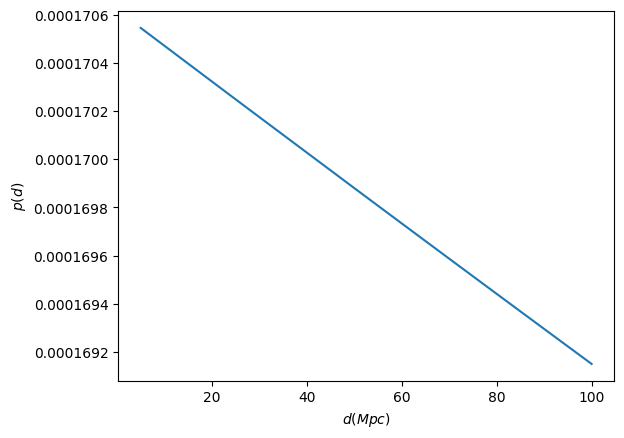

In [4]:
tab_d=np.array([5,25,50,60,70,80,90,100])
plt.plot(tab_d,P_d(tab_d))
print(P_d(tab_d))
plt.xlabel(r'$d (Mpc)$')
plt.ylabel(r'$p(d)$')

[-25.         -24.85714286 -24.71428571 -24.57142857 -24.42857143
 -24.28571429 -24.14285714 -24.         -23.85714286 -23.71428571
 -23.57142857 -23.42857143 -23.28571429 -23.14285714 -23.
 -22.85714286 -22.71428571 -22.57142857 -22.42857143 -22.28571429
 -22.14285714 -22.         -21.85714286 -21.71428571 -21.57142857
 -21.42857143 -21.28571429 -21.14285714 -21.         -20.85714286
 -20.71428571 -20.57142857 -20.42857143 -20.28571429 -20.14285714
 -20.         -19.85714286 -19.71428571 -19.57142857 -19.42857143
 -19.28571429 -19.14285714 -19.         -18.85714286 -18.71428571
 -18.57142857 -18.42857143 -18.28571429 -18.14285714 -18.        ]


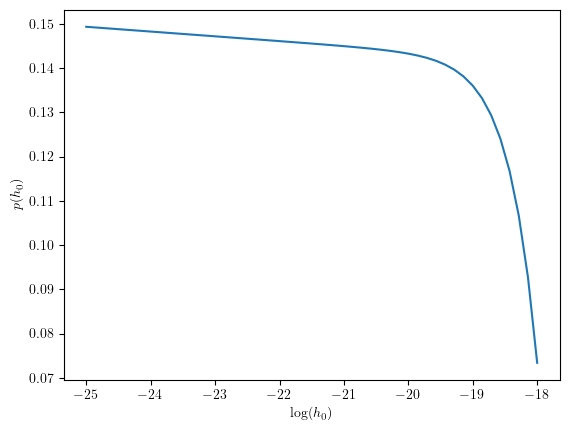

In [7]:
tab_h0=np.linspace(-25,-18,50)
print(tab_h0)
Ph0_norm=preprocessing.normalize(np.array([P_h0local(10**tab_h0)]))
plt.plot(tab_h0,(Ph0_norm[0]))
#print(P_h0local(10**tab_h0))
#print(Ph0_norm)
plt.xlabel(r'$\log(h_0)$')
plt.ylabel(r'$p(h_0)$')
plt.savefig('/local/home/dd274198/Documents/Figures/Priors/SMBH/amp_smbh.png')


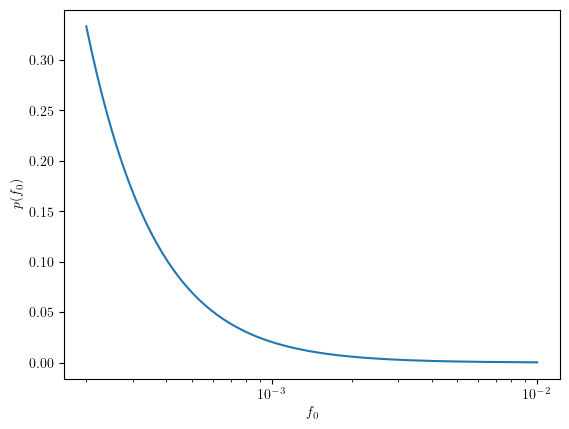

In [38]:
tab_f=np.linspace(2*10**(-4),10**(-2),1000)
Pf0_norm=preprocessing.normalize(np.array([P_f0(tab_f)]))
#plt.plot(tab_f,(Pf0_norm[0]))
plt.semilogx(tab_f,(Pf0_norm[0]))
plt.xlabel(r'$f_0$')
plt.ylabel(r'$p(f_0)$')
#print(P_f0(tab_f))
plt.savefig('/local/home/dd274198/Documents/Figures/Priors/SMBH/freq_smbh.png')

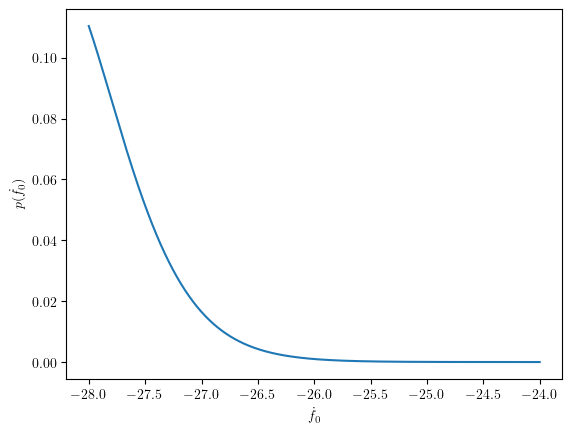

In [53]:
tab_fder=np.linspace(-28,-24,1000)
Pf0der_norm=preprocessing.normalize(np.array([P_f0dot(10**tab_fder)]))
plt.plot(tab_fder,(Pf0der_norm[0]))
#plt.semilogx(tab_fder,(Pf0der_norm[0]))
#print(P_f0dot(tab_f))
plt.xlabel(r'$\dot{f_0}$')
plt.ylabel(r'$p(\dot{f_0})$')
plt.savefig('/local/home/dd274198/Documents/Figures/Priors/SMBH/freqder_smbh.png')

In [3]:
def Phi_M(M):
    return 0.005*(M/3*10**6)**(-0.3)

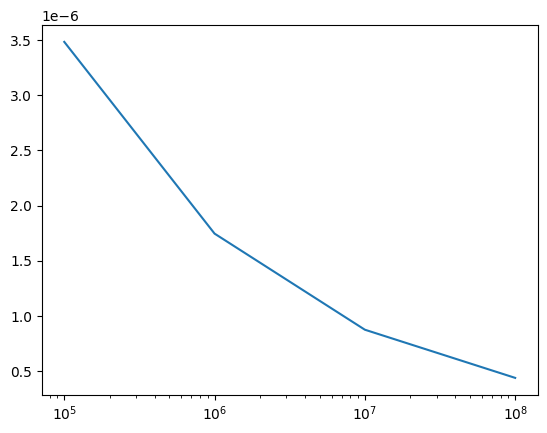

In [178]:
M=np.array([10**5,10**6,10**7,10**8])
plt.semilogx((M),(Phi_M(M)))

Text(0, 0.5, '$p(h_0)$')

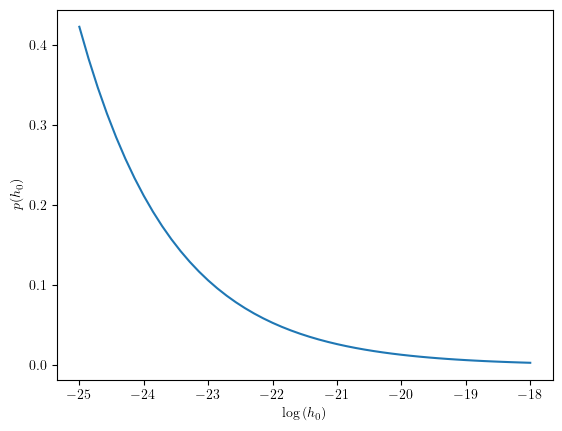

In [8]:
def P_h0Brito(x):
    return((1/C1_Mpc)*(0.005*((x/C1_Mpc)/3*10**6)**(-0.3)))

tab_h0=np.linspace(-25,-18,50)
Ph0B_norm=preprocessing.normalize(np.array([P_h0Brito(10**tab_h0)]))
#plt.plot(tab_h0,((P_h0Brito(10**tab_h0))))
plt.plot(tab_h0,(Ph0B_norm[0]))
plt.xlabel(r'$\log{(h_0)}$')
plt.ylabel(r'$p(h_0)$')

Text(0, 0.5, '$p(h_0)$')

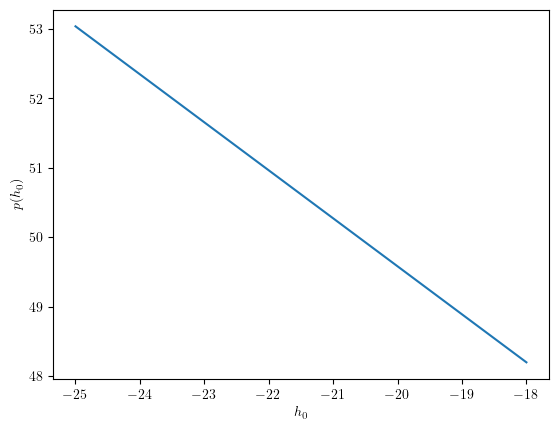

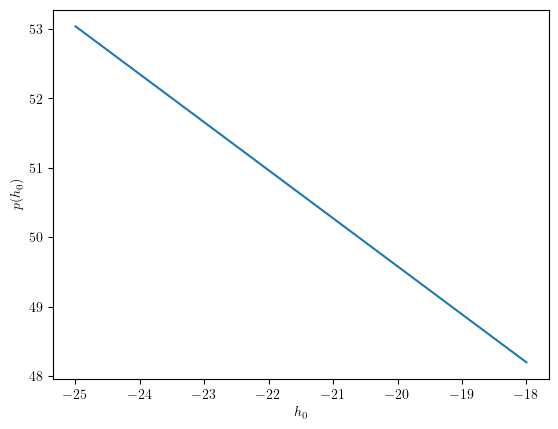

In [25]:
def logP_h0Brito(x):
    return -np.log(C1_Mpc)+np.log(0.005)-0.3*np.log((x/C1_Mpc)/3*10**6)
    #return -np.log(C1_Mpc)+np.log(0.005)-0.3*(np.log(x)-np.log(C1_Mpc*3*10**6))
                                             
                                             
                                             
plt.plot(tab_h0,(np.log(P_h0Brito(10**tab_h0))))
#Ph0Bfirst_norm=preprocessing.normalize(np.array([np.log(P_h0Brito(10**tab_h0))]))
#plt.plot(tab_h0,(np.log(Ph0Bfirst_norm[0])))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')


plt.figure()
#Ph0Blog_norm=preprocessing.normalize(np.array([logP_h0Brito(10**tab_h0)]))
#plt.plot(tab_h0,Ph0Blog_norm[0])
plt.plot(tab_h0,logP_h0Brito(10**tab_h0))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')